In [5]:
%load_ext autoreload
%autoreload 2


from spektral.layers import GraphAttention, GlobalAttentionPool
from spektral.utils import localpooling_filter


import utilities
from evaluator import Evaluator
from embedder import Embedder

from embedder import Transformer
from embedder import Transformer_autoencoder
from embedder import Transformer_GNN
from embedder import Preprocessing_scaler

import tmp_generator as tmp


from visualizator import Visualizator


from sklearn.decomposition import TruncatedSVD



from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

from Graph_generator import Graph_Generator
import utilities

n_graphs = 300

# 20 permutations
gg = Graph_Generator(n_graphs=n_graphs,
                     degree = 4)
g1, na1, ea1 = gg.generate(28,10,10,1)
g2, na2, ea2 = gg.generate(28,10,10,10)

graphs, labels = gg.generate_set(g1,g2,na1, ea1,na2, ea2,12,12,plot=False)

functions = [utilities.degree,utilities.clust_coefficient,utilities.local_degree_profile]
graphs = utilities.add_info_to_nodes(graphs,functions)

max_n_nodes, n_attributes = utilities.find_shapes(graphs)

n_classes = 2

In [6]:
dim = [2,3]
times = 2


# modello 1 GNN
my_GNN = tmp.generate_GNN(max_n_nodes,n_attributes,n_classes,
                           batch_size=32,
                           validation_split=0.2,
                           verbose=0,
                           epochs=10,
                           plot=False)
m_1 = Transformer(my_GNN)

# preprocessing scaler
my_scaler = Preprocessing_scaler([-0.5, 0.5])
# modello 2 Autoencoder
my_Autoencoder = tmp.gen_transf_autoencoder(batch_size=32,
                                            validation_split=0.2,
                                            epochs=10, 
                                            verbose=0,
                                            scaler=my_scaler,
                                            dim = dim,
                                            plot=False)

m_2 = Transformer(my_Autoencoder)


emb_1 = Embedder([m_1,m_2], name="Spketral 128 - Autoencoder denso")

	 iteration n: 1
	 	 dim:  2
	 	 	  Spketral 128 - Autoencoder denso
reset state TRANSFORMER
reset_state GNN
reset state TRANSFORMER
reset state AUTOENCODER


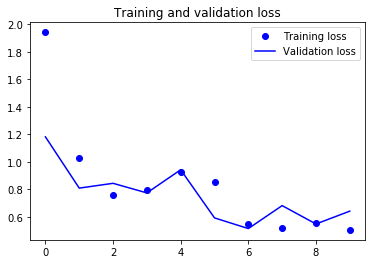

max loss 1.9414579300653367
min loss 0.5054839906238374
0


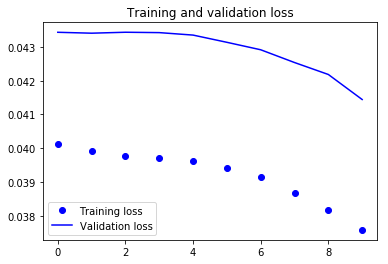

max loss 0.04012351908854076
min loss 0.03757824695536068
	 	 dim:  3
	 	 	  Spketral 128 - Autoencoder denso
reset state TRANSFORMER
reset_state GNN
reset state TRANSFORMER
reset state AUTOENCODER


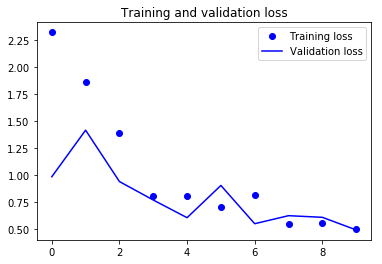

max loss 2.322074015935262
min loss 0.49878262054352535
0


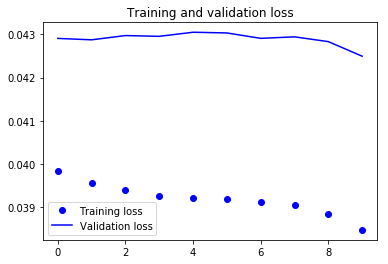

max loss 0.03982446839412054
min loss 0.03846866601989383
	 iteration n: 2
	 	 dim:  2
	 	 	  Spketral 128 - Autoencoder denso
reset state TRANSFORMER
reset_state GNN
reset state TRANSFORMER
reset state AUTOENCODER


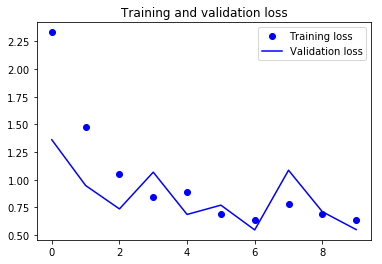

max loss 2.333445662543887
min loss 0.6353258859543574
0


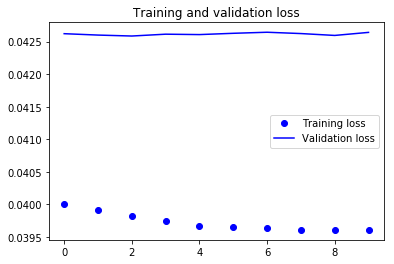

max loss 0.040009191703228725
min loss 0.0396067670413426
	 	 dim:  3
	 	 	  Spketral 128 - Autoencoder denso
reset state TRANSFORMER
reset_state GNN
reset state TRANSFORMER
reset state AUTOENCODER


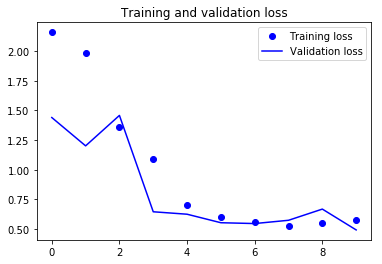

max loss 2.1590813455127535
min loss 0.523171793846857
0


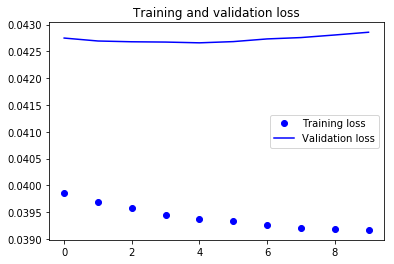

max loss 0.03985627190697761
min loss 0.039168955226029666


In [7]:
emb = [emb_1]

vis_500 = utilities.repeat_n_times(graphs, labels, emb, dim, times,test_size=0.3,seed = 11)

In [8]:
vis_500.summary(std = False)

                                      2      3    mean
--------------------------------  -----  -----  ------
Spketral 128 - Autoencoder denso  0.624  0.627   0.626
